<a href="https://colab.research.google.com/github/Pranaviate/MachineLearningNotebooks/blob/master/BaseCode_ImageRecog_hand_td.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEEJDK6k02wuhty-rOYzkzzrdJrmUIYJQgxbqtL1IC68PPyA23FtWY
Mounted at /content/drive


In [ ]:
import  tensorflow  as  tf
import  numpy  as  np
from  tensorflow . keras . datasets  import  mnist
import  pandas  as  pd
import  cv2
import  matplotlib . pyplot  as  plt
import  os
from  tensorflow . keras  import  models , layers , optimizers
from  keras . models  import  Model
from  tensorflow . keras . applications  import  VGG16
from  keras . applications . vgg16  import  preprocess_input , decode_predictions
from  tensorflow . keras . preprocessing . image  import  ImageDataGenerator , array_to_img , img_to_array , load_img
import  random

In [ ]:
datagen  =  ImageDataGenerator (
        rotation_range = 5 ,
        width_shift_range = 0.2 ,
        height_shift_range = 0.2 ,
        shear_range = 0.2 ,
        zoom_range = 0.2 ,
        horizontal_flip = True ,
        fill_mode = 'nearest' )

In [ ]:
path  =  '/content/drive/My Drive/hgd/'
for  folder  in  os . listdir ( path ):
    path_  =  path  +  folder  +  '/'
    # print ("FOLDER", folder)
    for  file  in  os.listdir ( path_ ):
        # print (file)
        if  file . endswith ( '.jpeg' ) and  not  "_gen"  in  file :
            
            img  =  load_img ( path_ + file )
            x  =  img_to_array ( img )  
            x  =  x . reshape (( 1 ,) +  x . shape )

            # the .flow () command below generates batches of randomly transformed images
            # and saves the results to the `preview /` directory
            i  =  0
            for  batch  in  datagen.flow ( x , batch_size = 1 ,save_to_dir = '/content/drive/My Drive/hgd/' + folder , save_prefix = str ( folder ) + 'gen',save_format = 'jpeg' ):
                i  +=  1
                if  i  >  5 :
                    break   # Generator stop feature

In [ ]:
path  =  '/content/drive/My Drive/hgd/up'
images  = []
labels  = []
images_color  = []

for  file  in  os . listdir ( path ):
    img  =  cv2 . imread ( path + '/' + file )    
    gray  =  cv2 . cvtColor ( img , cv2 . COLOR_BGR2GRAY )    
    resized  =  cv2 . resize ( gray , ( 100 , 100 ))
    resized  =  np . append ( resized , 1 )
    images . append ( resized )

In [ ]:
path2  =  path  =  '/content/drive/My Drive/hgd/down/'
for  file  in  os . listdir ( path2 ):
    img  =  cv2 . imread ( path2 + '/' + file )
    gray  =  cv2 . cvtColor ( img , cv2 . COLOR_BGR2GRAY )    
    resized  =  cv2 . resize ( gray , ( 100 , 100 ))
    resized  =  np . append ( resized , 0 )
    images . append ( resized )

In [ ]:
random . shuffle ( images )

labels  =  np . asarray ([ image [ - 1 ] for  image  in  images ])
images  =  np . asarray ([ image [ 0 : - 1 ]. reshape ( 100 , 100 , 1 ) for  image  in  images ])


images  =  images . astype ( 'float32' )
images   =   ( images ) /  255

In [ ]:
index_split  =  round ( 0.8 * len ( images ))

train_images  =  images [ 0 : index_split ]
test_images  =  images [ index_split ::]
train_labels  =  labels [ 0 : index_split ]
test_labels  =  labels [ index_split ::]

In [ ]:
model  =  models . Sequential ()
model . add ( layers . Conv2D ( 32 , ( 3 , 3 ), activation = 'relu' , input_shape = ( 100 , 100 , 1 )))
model . add ( layers . MaxPooling2D (( 2 , 2 )))
model . add ( layers . Conv2D ( 512 , ( 3 , 3 ), activation = 'relu' ))
model . add ( layers . MaxPooling2D (( 2 , 2 )))
model . add ( layers . Dropout ( 0.3 ))
model . add ( layers . Conv2D ( 256 , ( 3 , 3 ), activation = 'relu' ))
model . add ( layers . MaxPooling2D (( 2 , 2 )))
model . add ( layers . Conv2D ( 512 , ( 3 , 3 ), activation = 'relu' ))
model . add ( layers . MaxPooling2D (( 2 , 2 )))
model . add ( layers . Dropout ( 0.3 ))
model . add ( layers . Conv2D ( 256 , ( 3 , 3 ), activation = 'relu' ))
model . add ( layers . MaxPooling2D (( 2 , 2 )))
model . add ( layers . Flatten ())
model . add ( layers . Dense ( 512 , activation = 'relu' ))
model . add ( layers . Dense ( 1 , activation = 'sigmoid' ))

In [ ]:
model . compile ( loss = 'binary_crossentropy' ,
              optimizer = "adam" ,
              metrics = [ 'accuracy' ])

In [ ]:
history  =  model . fit ( train_images , train_labels , epochs = 20 , validation_data = ( test_images , test_labels ))

Epoch 1/20
6/6 [==============================] - 16s 3s/step - loss: 0.6978 - accuracy: 0.5893 - val_loss: 0.6892 - val_accuracy: 0.5476
Epoch 2/20
6/6 [==============================] - 16s 3s/step - loss: 0.6865 - accuracy: 0.5714 - val_loss: 0.6857 - val_accuracy: 0.5476
Epoch 3/20
6/6 [==============================] - 16s 3s/step - loss: 0.6895 - accuracy: 0.5714 - val_loss: 0.6907 - val_accuracy: 0.5476
Epoch 4/20
6/6 [==============================] - 16s 3s/step - loss: 0.6862 - accuracy: 0.5714 - val_loss: 0.6837 - val_accuracy: 0.5476
Epoch 5/20
6/6 [==============================] - 16s 3s/step - loss: 0.6799 - accuracy: 0.5714 - val_loss: 0.6774 - val_accuracy: 0.5476
Epoch 6/20
6/6 [==============================] - 16s 3s/step - loss: 0.6725 - accuracy: 0.5714 - val_loss: 0.6612 - val_accuracy: 0.5476
Epoch 7/20
6/6 [==============================] - 16s 3s/step - loss: 0.6739 - accuracy: 0.5595 - val_loss: 0.6516 - val_accuracy: 0.5476
Epoch 8/20
6/6 [==================

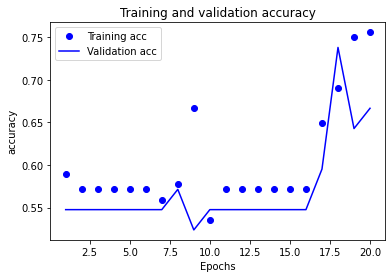

In [ ]:
acc  =  history . history [ 'accuracy' ]
val_acc  =  history . history [ 'val_accuracy' ]
epochs  =  range ( 1 , len ( acc ) +  1 )

plt . plot ( epochs , acc , 'bo' , label = 'Training acc' )
plt . plot ( epochs , val_acc , 'b' , label = 'Validation acc' )
plt . title ( 'Training and validation accuracy' )
plt . xlabel ( 'Epochs' )
plt . ylabel ( 'accuracy' )
plt . legend ()
plt . show ()


In [ ]:
model . save ( './model1_test' )

INFO:tensorflow:Assets written to: ./model1_test/assets


In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('/content/model_test')

In [ ]:
img = cv2.imread('//content/drive/My Drive/images.jpeg')  
#st.image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),width=200)  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
resized = cv2.resize(gray, (100, 100)).astype('float32')
resized = resized.reshape(100,100,1)
resized = np.expand_dims(resized, axis=0)
test = resized/255

result = model.predict_classes(test)
print(result)
if result == 1:
            print( "thumbs up!")
if result == 0:
        	print( "thumbs down!")

[[0]]
thumbs down!
